## Algoritmos e técnicas de programação
# TPC8
# Processamento de datasets EMD
* __data iní­cio__: 2021-11-29
* __data fim__: 2021-12-05
* __autor__: Francisca Fernandes Silva, A97691
* __resumo__: Para a realização deste tpc coloquei o dataset na mesma diretoria que este documento. O algoritmo permite ler o ficheiro _emd.csv_ e retirar certas informações deste, através das várias funções criadas. 
A primeira função é a essencial, pois é nesta que obtemos a informação do ficheiro e a tranformamos numa base de dados com 3 dimensões __bd=[[id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]],....]__ podendo agora manusea-lo de uma melhor forma. 
As restantes funções foram elaboradas  com o auxílio da aula prática e do tpc anterior. Este documento é utilzado para desenvolver um módulo(emd) para poder ser importado no outro ficheiro(gui). 

## Dataset

Para a resoluÃ§Ã£o dos exercÃ­cios desta ficha, descarrega o dataset de exames mÃ©dicos desportivos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
_id,index,dataEMD,nome/primeiro,nome/Ãºltimo,idade,gÃ©nero,morada,modalidade,clube,email,federado,resultado
6045074cd77860ac9483d34e,0,2020-02-25,Delgado,Gay,28,F,Gloucester,BTT,ACRroriz,delgado.gay@acrroriz.biz,true,true
6045074ca6adebd591b5d239,1,2019-07-31,Foreman,Prince,34,M,Forestburg,Ciclismo,ACDRcrespos,foreman.prince@acdrcrespos.org,false,true
6045074c221e2fdf430e9ef0,2,2021-01-06,Cheryl,Berger,21,M,Umapine,Basquetebol,Vitoria,cheryl.berger@vitoria.biz,false,true
6045074c529cbdce549d3923,3,2020-11-19,Graves,Goff,29,F,Babb,Andebol,AVCfamalicÃ£o,graves.goff@avcfamalicÃ£o.co.uk,false,false
6045074c3319a0f9e79aad87,4,2019-09-01,Mckay,Bolton,29,F,Chilton,Futebol,ACDRcrespos,mckay.bolton@acdrcrespos.me,false,false
6045074c222607e7520ffd24,5,2019-10-07,Marla,Kelley,22,M,Clarence,Atletismo,AmigosMontanha,marla.kelley@amigosmontanha.tv,false,false

...
```

## Leitura (exercÃ­cio 1)

Depois de pensares num modelo adequado especifica a funÃ§Ã£o que lÃª o ficheiro e povoa esse modelo.

Nota: os valores do campo id sÃ£o demasiado complexos para serem usados na aplicaÃ§Ã£o pelo utilizador.

Ideia: Cria ids novos, mais simples, tipo: emd00001, emd00002, ..., emd00100, ...

In [424]:
# Descreve em texto o teu modelo
# 
# BdEMD = [EMD]
# EMD = [id,dataEMD,pnome,unome,idade,gÃ©nero,morada,modalidade,clube,email,federado,resultado]
#
# Leitura/carregamento da informaÃ§Ã£o do ficheiro

def getEMD(linha):
    novaLinha=linha.strip("\n") # ou replace("\","") | aqui substituimos a aspa por uma string vazia
    emd=[] 
    campos=novaLinha.split(",") #Separar o texto 
    emd.append("emd"+str(int(campos[1])+1))
    for i in range(2,len(campos)):
        emd.append(campos[i])
    return emd

def lerDataset(fnome):
    # abrir o ficheiro apenas em leitura
    f = open(fnome, encoding="utf-8")
    bd = [] #criar uma lista vazia
    f.readline() #retirar o título
    #colocar o conteúdo do ficheiro e colocar dentro da Bd
    for linha in f: #correr as linhas do ficheiro
        emd=getEMD(linha)
        bd.append(emd)
    return bd 

In [425]:
BD = []
BD = lerDataset("./emd.csv")
print(BD)

[['emd1', '2020-02-25', 'Delgado', 'Gay', '28', 'F', 'Gloucester', 'BTT', 'ACRroriz', 'delgado.gay@acrroriz.biz', 'true', 'true'], ['emd2', '2019-07-31', 'Foreman', 'Prince', '34', 'M', 'Forestburg', 'Ciclismo', 'ACDRcrespos', 'foreman.prince@acdrcrespos.org', 'false', 'true'], ['emd3', '2021-01-06', 'Cheryl', 'Berger', '21', 'M', 'Umapine', 'Basquetebol', 'Vitoria', 'cheryl.berger@vitoria.biz', 'false', 'true'], ['emd4', '2020-11-19', 'Graves', 'Goff', '29', 'F', 'Babb', 'Andebol', 'AVCfamalicão', 'graves.goff@avcfamalicão.co.uk', 'false', 'false'], ['emd5', '2019-09-01', 'Mckay', 'Bolton', '29', 'F', 'Chilton', 'Futebol', 'ACDRcrespos', 'mckay.bolton@acdrcrespos.me', 'false', 'false'], ['emd6', '2019-10-07', 'Marla', 'Kelley', '22', 'M', 'Clarence', 'Atletismo', 'AmigosMontanha', 'marla.kelley@amigosmontanha.tv', 'false', 'false'], ['emd7', '2020-12-11', 'Merrill', 'Maddox', '34', 'M', 'Roderfield', 'Equitação', 'ACRroriz', 'merrill.maddox@acrroriz.com', 'false', 'true'], ['emd8', '2

## Listagem (exercÃ­cio 2)

Especifica uma funÃ§Ã£o que faÃ§a a listagem no monitor dos vÃ¡rios registos de informaÃ§Ã£o por ordem cronolÃ³gica decrescente.

Tenta dar a forma duma tabela em que as colunas tÃªm todas a mesma dimensÃ£o. (semelhante ao 2 anterior)

In [426]:
# Listagem da informaÃ§Ã£o
# id | data| nome| apto

def chaveOrd(exame):
    return exame[1]

def listarDataset(bd):
    bd.sort(key=chaveOrd,reverse=True) #ORDENAR
    print ("{:<10} {:<15} {:<25} {:<8}".format('Id','Data','Nome','Apto'))
    for e in bd:
        print ("{:<10} {:<15} {:<25} {:<8}".format(e[0],e[1],e[2]+" "+e[3],e[11]))
    return 

listarDataset(BD)

Id         Data            Nome                      Apto    
emd29      2021-03-02      Roberta Joseph            false   
emd24      2021-02-25      Castro Weber              false   
emd94      2021-02-22      Larsen Miles              false   
emd89      2021-02-15      Nunez Guy                 true    
emd99      2021-02-15      Douglas Gay               true    
emd72      2021-02-06      Stefanie Byrd             false   
emd91      2021-01-30      Fowler Madden             false   
emd41      2021-01-26      Levine Sampson            false   
emd54      2021-01-22      Vivian Mercado            true    
emd89      2021-01-20      Anita Lyons               true    
emd31      2021-01-18      Freida Mcneil             false   
emd93      2021-01-13      Bowers Gilliam            false   
emd100     2021-01-13      Glenn Best                true    
emd11      2021-01-12      Frost Dejesus             true    
emd76      2021-01-11      Fields Colon              true    
emd25   

## Consulta de um registo (exercÃ­cio 3)

Especifica uma funÃ§Ã£o que, dado o id de um EMD, coloca a sua informaÃ§Ã£o no monitor.

In [427]:
# Consulta de um registo.

def consultarDataset(bd,id): #podes usar um semáforo como na aula teorica T7 #mas esta forma mais smart
    i=0
    while bd[i][0]!=id:
        i=i+1
    return bd[i]

reg=consultarDataset(BD,"emd27")
print (reg)

['emd27', '2019-11-22', 'Nadine', 'Nixon', '27', 'F', 'Iola', 'Orientação', 'GDGoma', 'nadine.nixon@gdgoma.info', 'true', 'false']


## Modalidades (exercÃ­cio 4)

Especifica um funÃ§Ã£o que dÃ¡ como resultado uma lista de modalidades ordenada alfabeticamente e sem repetiÃ§Ãµes.

In [428]:

def modalidades(bd):
    lista=[]
    for emd in bd:
        if emd[7] not in lista:
            lista.append(emd[7])
    lista.sort()
    return lista


In [429]:
print(modalidades(BD)) #os codigos das maiusculas tem valor maior que as minusculas daí BTT aparecer primeiro que badminton

['Andebol', 'Atletismo', 'BTT', 'Badminton', 'Basquetebol', 'Ciclismo', 'Dança', 'Equitação', 'Esgrima', 'Futebol', 'Karaté', 'Orientação', 'Parapente', 'Patinagem', 'Triatlo']


## DistribuiÃ§Ã£o por modalidade (exercÃ­cio 5)

Especifica uma funÃ§Ã£o que dÃ¡ como resultado uma lista de pares indicando quantos EMD estÃ£o registados em cada modalidade.

In [430]:
def distribPorModalidade(bd):
    distribuicao={}
    for emd in bd:
        if emd[7] in distribuicao.keys():
            distribuicao[emd[7]]=distribuicao[emd[7]]+1
        else:
            distribuicao[emd[7]]=1
    return distribuicao

distribPorModalidade(BD)


{'Futebol': 21,
 'Basquetebol': 24,
 'Dança': 22,
 'Equitação': 13,
 'Atletismo': 16,
 'Esgrima': 15,
 'Andebol': 21,
 'Badminton': 24,
 'Parapente': 17,
 'Patinagem': 14,
 'BTT': 29,
 'Orientação': 17,
 'Karaté': 21,
 'Triatlo': 23,
 'Ciclismo': 23}

## DistribuiÃ§Ã£o por clubes (exercÃ­cio 6)

Especifica uma funÃ§Ã£o que dÃ¡ como resultado uma lista de pares indicando quantos EMD estÃ£o registados por cada clube.

In [431]:
def distribPorClube(bd):
    distribuicao= {}
    for emd in bd:
        if emd[8] in distribuicao.keys():
            distribuicao[emd[8]]=distribuicao[emd[8]]+1
        else:
            distribuicao[emd[8]]=1
    return distribuicao

distribPorClube(BD)


{'AmigosMontanha': 35,
 'EDViana': 34,
 'SCBraga': 34,
 'GDGoma': 26,
 'AVCfamalicão': 31,
 'Vitoria': 32,
 'ABCbraga': 30,
 'ACRroriz': 37,
 'ACDRcrespos': 41}

## DistribuiÃ§Ã£o por ano (exercÃ­cio 7)

Especifica uma funÃ§Ã£o que dÃ¡ como resultado uma lista de pares indicando quantos EMD estÃ£o registados por cada ano.

In [432]:

def ordAno (registo):
    return registo[1]

def distribPorAno(bd):
    # EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
    # data : ano-mes-dia, e uma strig, o ano tem 4 numeros logo corresponde str[0:4] o quarto nao e incluido
    distribuicao = {}
    bd.sort(reverse = True, key = ordAno) #por do mais recente para o menos
    for registo in bd:
        if registo[1][0:4] in distribuicao.keys():
            distribuicao[registo[1][0:4]] = distribuicao[registo[1][0:4]]+1
        else:
            distribuicao[registo[1][0:4]] = 1
    return distribuicao #{ano : numero de emd}

distribPorAno(BD)



{'2021': 17, '2020': 138, '2019': 145}

## DistribuiÃ§Ã£o parametrizada (exercÃ­cio 8)

Especifica uma funÃ§Ã£o que permita calcular uma distribuiÃ§Ã£o por qualquer um dos campos da BD.

In [433]:
def buscarCampo (campo):
    if campo == "Ano":
        return distrib(1,BD)
    elif campo == "Idade":
        return distrib(4,BD)
    elif campo == "Genero" :
        return distrib(5,BD)
    elif campo == "Morada":
        return distrib(6,BD)
    elif campo == "Modalidade":
        return distrib(7,BD)
    elif campo == "Clube" :
        return distrib(8,BD)
    elif campo == "Federado":
        return distrib(10,BD)
    elif campo == "Resultado" :
        return distrib(11,BD)

def distrib(n,bd):
    distribuicao = {}
    if n == 1 :
        return distribPorAno(bd)
    elif n == 7 :
        return distribPorModalidade(bd)
    elif n == 8 :
        return distribPorClube(bd)
    else:
        for registo in bd:
            if registo[n] in distribuicao.keys():
                distribuicao[registo[n]] = distribuicao[registo[n]]+1
            else:
                distribuicao[registo[n]] = 1
        return distribuicao #{campo : numero de emd}

print(distrib (4, BD))


{'29': 21, '31': 24, '22': 24, '34': 19, '33': 20, '21': 17, '35': 14, '32': 24, '27': 24, '23': 20, '25': 12, '28': 24, '30': 17, '24': 19, '26': 21}


# GrÃ¡ficos

## GrÃ¡fico da distribuiÃ§Ã£o por modalidade (exercÃ­cio 9)

Especifica uma funÃ§Ã£o que faz o plot dum grÃ¡fico com a distribuiÃ§Ã£o de alunos por modalidade.

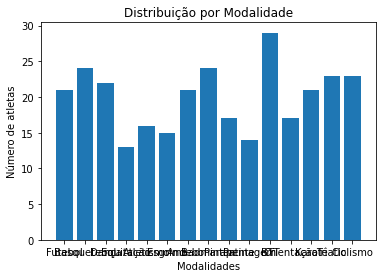

In [434]:
import matplotlib.pyplot as plt
def plotDistribPorModalidade(bd):
    distribuicao = distribPorModalidade(bd)
    # heights of bars
    modalidade = distribuicao.values()
    height = []
    for m in modalidade :
        height.append(m)   
 
    # labels for bars
    numero_emd = distribuicao.keys() #retorna lista com as chaves, nomne dos cursos
    x = []
    i = 1
    tick_label = []
    for emd in numero_emd:
        tick_label.append(emd)
        x.append(i)
        i = i+1
 
    # plotting a bar chart
    plt.bar(x,height, tick_label = tick_label, width = 0.8)
    # naming the x-axis
    plt.xlabel('Modalidades')
    # naming the y-axis
    plt.ylabel('Número de atletas')
    # plot title
    plt.title('Distribuição por Modalidade')
    plt.show() 

plotDistribPorModalidade(BD)




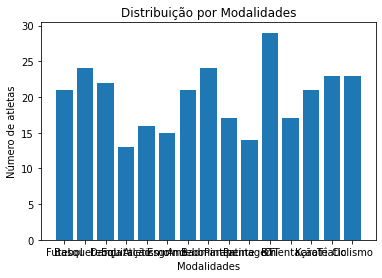

In [435]:
distribuicao = distribPorModalidade(BD)
plt.bar(distribuicao.keys(), distribuicao.values())
plt.xlabel('Modalidades')
plt.ylabel('Número de atletas')
plt.title('Distribuição por Modalidades')
plt.show() 

## GrÃ¡fico duma distribuiÃ§Ã£o qualquer (exercÃ­cio 9)

Especifica uma funÃ§Ã£o que faz o plot dum grÃ¡fico com a distribuiÃ§Ã£o passada como argumento.

Nota: Que parÃ¢metros sÃ£o necessÃ¡rios para ter uma funÃ§Ã£o genÃ©rica que trace o grÃ¡fico para qualquer distribuiÃ§Ã£o?


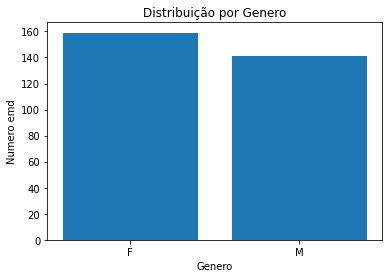

In [436]:
def plotDistrib(campo):
    import matplotlib.pyplot as plt
    if campo == "Modalidade":
        plotDistribPorModalidade(BD)
    elif campo == "Clube":
        distribuicao = distribPorClube(BD)
        # heights of bars
        clube = distribuicao.values()
        height = []
        for c in clube :
            height.append(c)   
        # labels for bars
        numero_emd = distribuicao.keys() #retorna lista com as chaves, nomne dos cursos
        x = []
        i = 1
        tick_label = []
        for emd in numero_emd:
            tick_label.append(emd)
            x.append(i)
            i = i+1
        # plotting a bar chart
        plt.bar(x,height, tick_label = tick_label, width = 0.8)
        # naming the x-axis
        plt.xlabel('clubes')
        # naming the y-axis
        plt.ylabel('número atletas')
        # plot title
        plt.title('Distribuição por Clube')
        plt.show()
    elif campo=="Ano":
        distribuicao = distribPorAno(BD)
        # heights of bars
        ano = distribuicao.values()
        height = []
        for a in ano :
            height.append(a)   
        # labels for bars
        numero_emd = distribuicao.keys() #retorna lista com as chaves, nomne dos cursos
        x = []
        i = 1
        tick_label = []
        for emd in numero_emd:
            tick_label.append(emd)
            x.append(i)
            i = i+1
        # plotting a bar chart
        plt.bar(x,height, tick_label = tick_label, width = 0.8)
        # naming the x-axis
        plt.xlabel('ano')
        # naming the y-axis
        plt.ylabel('número atletas')
        # plot title
        plt.title('Distribuição por ano')
        plt.show()
    else:
        # heights of bars
        distribuicao = buscarCampo(campo)
        numero_emd = distribuicao.values()
        height = []
        for emd in numero_emd :
            height.append(emd)   
 
    # labels for bars
        campos = distribuicao.keys() 
        x = []
        i = 1
        tick_label = []
        for c in campos:
            tick_label.append(c)
            x.append(i)
            i = i+1
 
        # plotting a bar chart
        plt.bar(x,height, tick_label = tick_label, width = 0.8)
        # naming the x-axis
        plt.xlabel(campo)
        # naming the y-axis
        plt.ylabel('Numero emd')
        # plot title
        plt.title('Distribuição por ' + campo)
        plt.show()
    
plotDistrib("Genero")

## Graphical user interface

In [1]:
pip install pysimplegui

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import PySimpleGUI as sg

# Painel com duas colunas: 
# Coluna 1: menu
# Coluna 2: Dados

menu_list_column = [
    [sg.Button("Limpar BD")],
    [sg.Button("Carregar BD")],
    [sg.Button("Gravar BD")],
    [sg.Button("Listar BD")],
    [sg.Button("Inserir registo")],
    [sg.Button("Sair")]
]

data_viewer_column = [
    [sg.Text("Painel de Dados")],
    [sg.Text(size=(40, 1), key="-Dados-")],
]

# ----- Full layout -----
layout = [
    [
        sg.Column(menu_list_column),
        sg.VSeperator(),
        sg.Column(data_viewer_column),
    ]
]

window = sg.Window("Sample App", layout)

# Run the Event Loop
stop = False
while not stop:
    event, values = window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True
    # Folder name was filled in, make a list of files in the folder
    elif event == "Limpar BD":
        window["-Dados-"].update("Vou limpar a BD...")
    elif event == "Carregar BD":  
        window["-Dados-"].update("Vou carregar a BD...")
    elif event == "Gravar BD":  
        window["-Dados-"].update("Vou gravar a BD...")
    elif event == "Listar BD":  
        window["-Dados-"].update("Vou listar a BD...")
    elif event == "Inserir registo":  
        window["-Dados-"].update("Vou inserir um registo...")
        
    else:
        window["-Dados-"].update("Erro: evento desconhecido :: " + inputEvent)

window.close()

In [2]:
import PySimpleGUI as sg

# Painel com duas colunas: 
# Coluna 1: menu
# Coluna 2: Dados

menu_list_column = [
    [sg.Button("Carregar")],
    [sg.Button("Listar")],
    [sg.Button("Modalidades")],
    [sg.Button("Por ano")],
    [sg.Button("Por Clube")],
    [sg.Button("Sair")]
]

data_viewer_column = [
    [sg.Text("Painel de Dados")],
    [sg.Text(size=(40, 1), key="-Dados-")],
]

# ----- Full layout -----
layout = [
    [
        sg.Column(menu_list_column), #vai buscar a lista do menu
        sg.VSeperator(), #separador vertical
        sg.Column(data_viewer_column), # vai buscar a lista dos dados
    ]
]

window = sg.Window("Sample App", layout)

import emdApp as emd

myBD = emd.carregar()
# Run the Event Loop
stop = False
while not stop:
    event, values = window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True
    # Folder name was filled in, make a list of files in the folder
    elif event == "Carregar":
        contador = emd.contadorBD()
        dados = "Foram carregados " + str(contador) + " registos."
        window["-Dados-"].update(dados)
    elif event == "Listar":  
        tabela = emd.listarDataset()
        window["-Dados-"].update(tabela)
    elif event == "Modalidades":  
        modalidades = emd.modalidades()
        window["-Dados-"].update(modalidades)
    elif event == "Por ano":  
        ano = emd.porAno()
        window["-Dados-"].update(ano)
    elif event == "Por Clube":  
        clube = emd.porClube()
        window["-Dados-"].update(clube)
    else:
        window["-Dados-"].update("Erro: evento desconhecido") # + inputEvent

window.close()